# Анализ развлекательного приложения Procrastinate Pro+

### 1. Описание проекта

**Данные:** 3 датасета с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года

**Задача:** Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки - необходимо разобраться в причинах и помочь компании выйти в плюс. 

**План работы:** Изучим следующие вопросы:
- откуда приходят пользователи и какими устройствами они пользуются
- сколько стоит привлечение пользователей из различных рекламных каналов
- сколько денег приносит каждый клиент
- когда расходы на привлечение клиента окупаются
- какие факторы мешают привлечению клиентов

### 2. Изучение и подготовка данных к анализу

In [1]:
#загрузим данные
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

try:
    visits, orders, costs = (
    pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Проекты/6 - Анализ бизнес показателей(приложение реклама)/visits_info_short.csv'),
    pd.read_csv('C:/Users/Yulia\Desktop/Yandex Practicum/Проекты/6 - Анализ бизнес показателей(приложение реклама)/orders_info_short.csv'),
    pd.read_csv('C:/Users/Yulia\Desktop/Yandex Practicum/Проекты/6 - Анализ бизнес показателей(приложение реклама)/costs_info_short.csv')
)
except:
    print('Ошибка при загрузке файла')

In [2]:
#изучим данные о визитах
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [3]:
#посмотрим общую информацию по датафрейму
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
#переименуем столбцы
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [5]:
#поменяем тип данных столбцов 'session_start' и 'session_end' на datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
#проверим явные дубликаты
visits.duplicated().sum()

0

In [7]:
#проверим на неявные дубликаты столбец 'region'
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [8]:
#проверим на неявные дубликаты столбец 'device'
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [9]:
#проверим на неявные дубликаты столбец 'channel'
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [10]:
#проверим данные на наличие ошибок в датах сессий
visits.query('session_start > session_end')['user_id'].count()

0

In [11]:
visits.query('session_start == session_end')['user_id'].count()

163

In [12]:
#изучим данные по заказам
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [13]:
#посмотрим общую информацию по датафрейму
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [14]:
#переименуем столбцы
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [15]:
#переведем столбец 'event_dt' в формат datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [16]:
#проверим на явные дубликаты
orders.duplicated().sum()

0

In [17]:
#посмотрим на числовое описание данных столбца 'revenue'
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

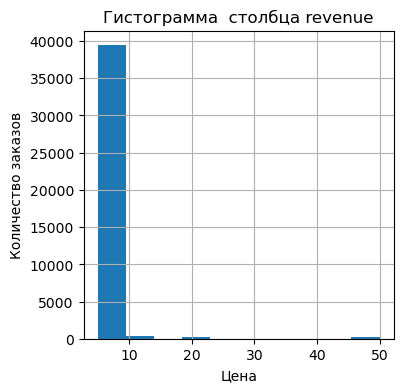

In [48]:
#построим гистограмму для столбца 'revenue'
orders['revenue'].hist(figsize=(4,4))
plt.ylabel('Количество заказов')
plt.xlabel('Цена')
plt.title('Гистограмма  столбца revenue')
plt.show()

In [19]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

In [20]:
#посмотрим на данные о расходах
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [21]:
#изучим общую информацию о датафрейме
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [22]:
#переименуем столбцы
costs = costs.rename(columns={'Channel': 'channel'})

In [23]:
#переведем столбец 'dt' в формат datetime
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [24]:
#проверим на явные дубликаты
costs.duplicated().sum()

0

In [25]:
#проверим на неявные дубликаты столбец 'channel'
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [26]:
#посмотрим на числовое описание данных столбца
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

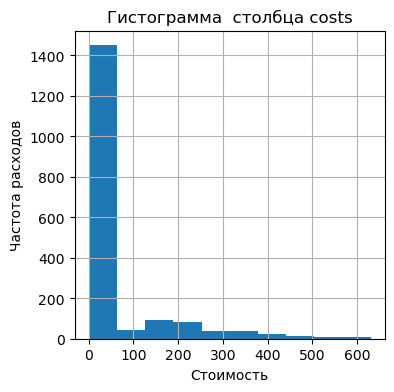

In [49]:
#построим гистограмму для столбца 'costs'
costs['costs'].hist(figsize=(4,4))
plt.ylabel('Частота расходов')
plt.xlabel('Стоимость')
plt.title('Гистограмма  столбца costs')
plt.show()

**Вывод:** В процессе изучения и подготовки данных были сделаны следующие шаги: 

- загружены датасеты /datasets/visits_info_short.csv, /datasets/orders_info_short.csv, /datasets/costs_info_short.csv
- пропусков в данных не оказалось
- названия столбцов были приведены к нижнему регистру
- данные столбцов с информацией о дате и времени были приведены к формату datetime
- данные были проверены на наличие явных и неявных дубликатов - таковых в данных не оказалось
- в данных 163 записи, где дата начала сессии совпадает с датой окончания. Скорее всего речь идет о технических неполадках. Однако эти записи составляют только 0,05% данных.
- стоимость 96% заказов составляет 4,99. Сумма оставшиеся 4% заказов колеблется от 5,99 до 49,99 - необходимо проверить не являются ли эти записи ошибочными. В рамках текущего анализа было принято решение данные сохранить. 
- из гистограммы столбца 'costs', видно что большая часть расходов на рекламу не превышает 50, однако на некоторые кампании уходило до 630. 

### 3. Добавление функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Добавим функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [28]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [29]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [30]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [31]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [32]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [33]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [34]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [35]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(17, 12))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### 4. Исследовательский анализ данных

#### 4.1 Составим профили пользователей

In [36]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [37]:
#найдем минимальную дату привлечения пользователей
min_analysis_date = profiles['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

In [38]:
#найдем максимальную дату привлечения пользователей
max_analysis_date = profiles['dt'].max()
max_analysis_date

datetime.date(2019, 10, 27)

**Вывод:** 
 - профили пользователей составлены
 - минимальная дата привлечения пользователей - 01.05.2019
 - максимальная дата привлечения пользователей - 27.10.2019

#### 4.2 Анализ регионов

In [39]:
#найдем количество пользователей и долю платящих из каждой страны
(profiles
    .groupby('region')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'user_id':'user_total', 'payer': 'payer_share'})
    .style.format({'payer_share': "{:.2%}"})
)

,user_total,payer_share
region,,
United States,100002,6.90%
Germany,14981,4.11%
UK,17575,3.98%
France,17450,3.80%


**Вывод:** 
- В приложение приходят пользователи из четырех стран - США, Германия, Великобритания и Франция
- Больше всего пользователей приходят из США - 100тыс, что составляет 66% от общего числа пользователей. Из европейских стран приходит примерно одинаковое количество пользователей - по 15-17тыс, т.е. 10-12%
- Доля платящих пользователей выше всего также в США - 6,9%. Самая низкая доля платящих пользователей у Франции - 3,8%

#### 4.3 Анализ устройств

In [40]:
#найдем количество пользователей и долю платящих для каждого устройства
(profiles
    .groupby('device')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'user_id':'user_total', 'payer': 'payer_share'})
    .style.format({'payer_share': "{:.2%}"})
)

,user_total,payer_share
device,,
Mac,30042,6.36%
iPhone,54479,6.21%
Android,35032,5.85%
PC,30455,5.05%


**Вывод:**
- Пользователи заходят в приложение с четырех устройств - Mac, iPhone, Android, PC
- iPhone является лидером среди устройств - им пользуются 54,5тыс (36%) пользователей. Далее идет Android с 35тыс (23%) пользователей. Mac и PC имеют почти одинаковое количество пользователей - 30тыс (20%)
- Доля платящих клиентов выше всего у пользователей Mac - 6,36%. Самая низкая доля платящих клиентов у пользователей PC - 5,05%

#### 4.4 Анализ каналов привлечения

In [41]:
#найдем количество пользователей и долю платящих для каждого канала привлечения
(profiles
    .groupby('channel')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'user_id':'user_total', 'payer': 'payer_share'})
    .style.format({'payer_share': "{:.2%}"})
)

,user_total,payer_share
channel,,
FaceBoom,29144,12.20%
AdNonSense,3880,11.34%
lambdaMediaAds,2149,10.47%
TipTop,19561,9.60%
RocketSuperAds,4448,7.91%
WahooNetBanner,8553,5.30%
YRabbit,4312,3.83%
MediaTornado,4364,3.57%
LeapBob,8553,3.06%


**Вывод:**
- Отдел маркетинга сотрудничает с 10тью рекламными каналами, которые привлекли в общей сумме 93,5тыс. пользователей, что составляет 62% от общего числа клиентов. Оставшиеся 38% (56,5тыс) пользователей являются органическим трафиком. 
- Больше всего пользователей пришли из каналов:
   - FaceBoom - 29тыс (19%)
   - TipTop - 19,5тыс (13%)
- Меньше всего пользователей привели каналы: 
   - lambdaMediaAds - 2тыс (1,3%)
   - AdNonSense - 3,8тыс (2,5%)
- Доля платящих пользователей выше всего у каналов: 
   - FaceBoom - 12,2%
   - AdNonSense - 11,34%
- Доля платящих пользователей ниже всего у каналов:
   - OppleCreativeMedia - 2,71%
   - LeapBob - 3,06%
- Доля платящих клиентов у оранического трафика по сравнению с рекламными каналами самая низкая - 2,06%

### 5. Маркетинг

#### 5.1 Общая сумма расходов на маркетинг

In [42]:
#посчитаем общую сумму расходов на маркетинг
costs_total = costs['costs'].sum().round()
costs_total

105497.0

**Вывод:** общая сумма расходов на маркетинг составляет 105497

#### 5.2 Анализ источников расходов

In [43]:
#посмотрим как траты распределены по рекламным источникам
costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод:**
- Больше всего средств потрачено на каналы:
  - TipTop - 54,7тыс (52%)
  - FaceBoom - 32,4тыс (31%)
- Меньше всего средств потрачено на каналы:
  - YRabbit и MediaTornado -  0,9тыс каждый (0,6%)
  - lambdaMediaAds - 1,5тыс (1%)

#### 5.3 Динамика изменения расходов во времени

In [44]:
#добавим столбцы с номером месяца и недели
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

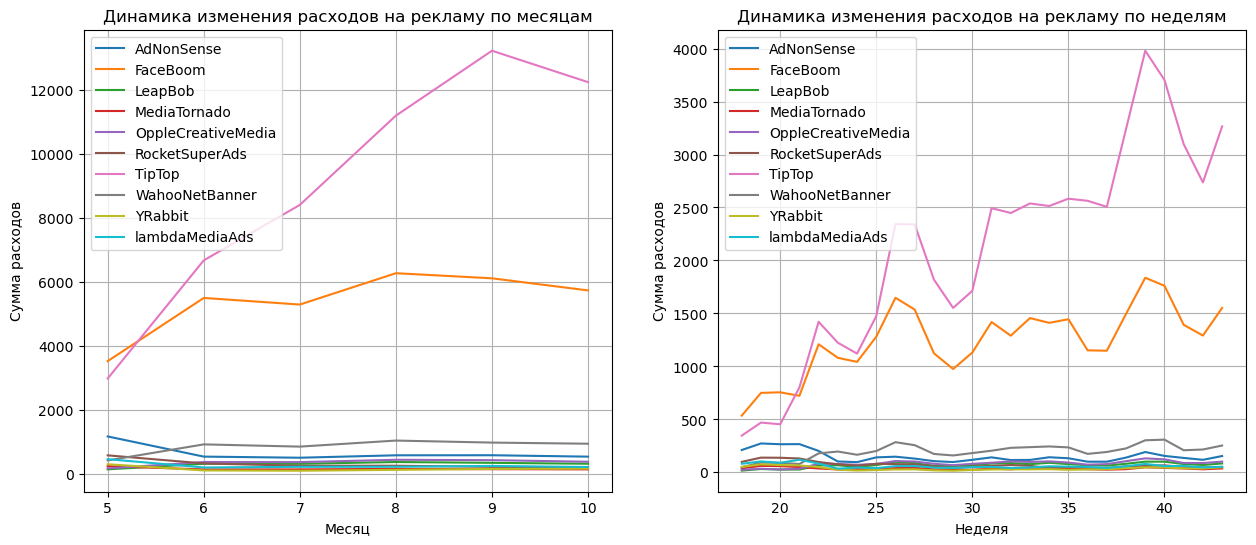

In [45]:
#построим графики динамики изменения расходов по каналам по месяцам и неделям
plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
(costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
      .plot(grid=True, ax=ax1)
)

plt.title('Динамика изменения расходов на рекламу по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма расходов')
plt.legend(loc='upper left')

ax2 = plt.subplot(1,2,2)
(costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
      .plot(grid=True, ax=ax2)
)
plt.title('Динамика изменения расходов на рекламу по неделям')
plt.xlabel('Неделя')
plt.ylabel('Сумма расходов')
plt.legend(loc='upper left')
plt.show()

**Вывод:** 
- Расходы на каналы TipTop и FaceBoom растут во времени, при этом расходы на канал TipTop растут больше всего. Максимальная сумма расходов приходится на сентябрь.
- Расходы на остальные каналы достаточно стабильны в рамках динамики по месяцам и неделям

#### Анализ CAC

In [46]:
#посмотрим сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
(profiles
     .query('channel != "organic"')
     .pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
     .sort_values(by='acquisition_cost', ascending=False)
     .rename(columns={'acquisition_cost': 'acquisition_cost_mean'})
     .round(2)
)

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [51]:
#посчитаем средний САС по проекту
round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2)

1.13

**Вывод:**
- Привлечение пользователей через каналы TipTop и FaceBoom стоит дороже всего - 2,8 и 1,11 соответственно. Расходы на эти 2 канала растут во времени и составляют 83% расходов на маркетинг. Как мы видели выше, эти 2 канала приносят больше всего пользователей и более того FaceBoom является лидером по доле платящих клиентов. Однако, необходимо проанализировать, окупаются ли такие большие расходы на эти 2 канала.
- Средняя стоимость привлечения клиентов ниже всего у каналов LeapBob, MediaTornado, YRabbit - 0,2

### 6. Анализ окупаемости рекламы

#### 6.1 Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Для анализа рекламы построим графики LTV, ROI и CAC. В целях анализа исключим органический трафик, так как эти пользователи зашли в приложение с помощью обычных запросов в поисковых системах, а не платных рекламных объявлений. Горизонт анализа установим в 14 дней, так как в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

In [53]:
#исключим органический трафик
profiles_final = profiles.query('channel != "organic"')

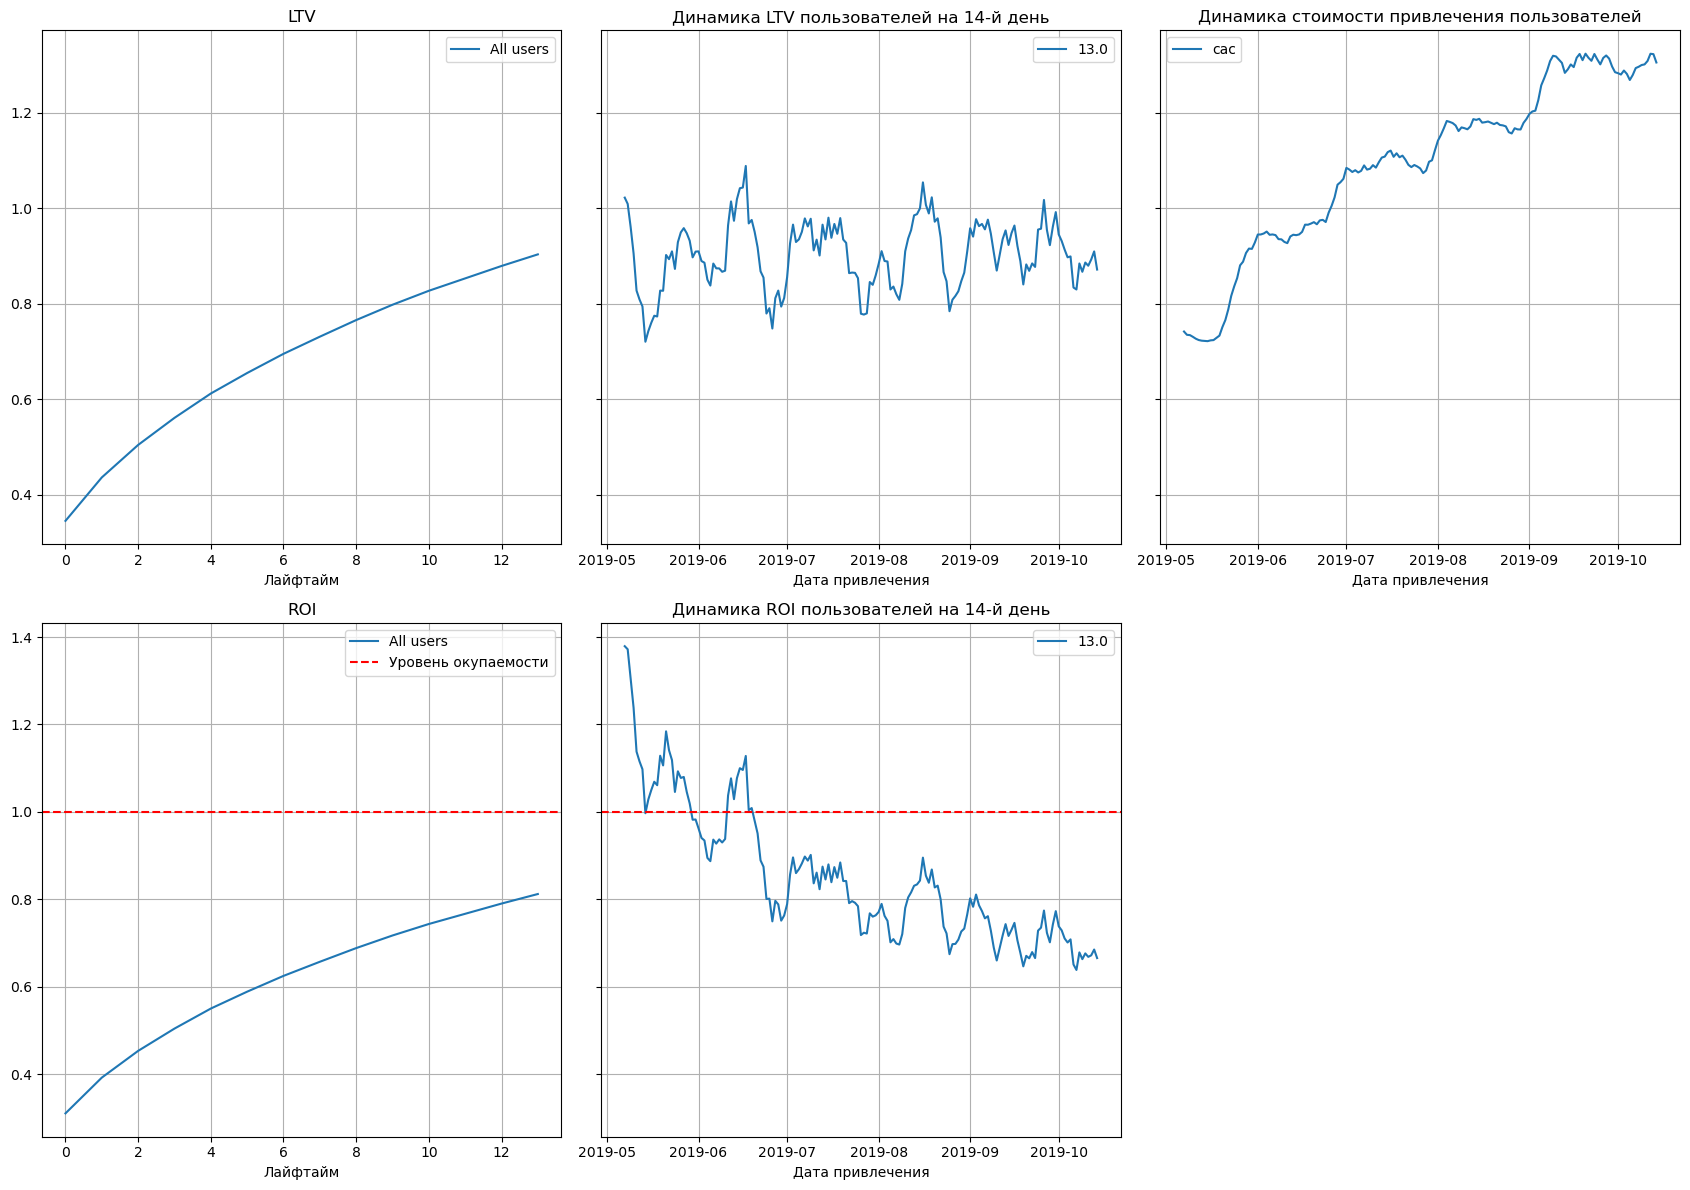

In [54]:
#построим графики LTV, ROI и CAC
horizon_days = 14
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_final, orders, max_analysis_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:**
- В целом, реклама не окупается. Как видим из графика ROI на конец второй недели находится на уровне 80%.
- На LTV влияет сезонность, однако этот показатель достаточно стабилен, то есть причина не в снижении средней суммы покупок, которые делают пользователи.
- Стоимость привлечения пользователей растет и к концу второй недели сильно превышает LTV, что является как минимум одной из причин неокупаемости рекламы. Как видим из графиков, самая низкая стоимость была в мае и в этом месяце реклама окупилась. Далее с ростом стоимости привлечения пользователей, мы видим, что реклама перестала окупаться. Необходимо выявить дорогостоящие и неэффективные каналы привлечения пользователей и скорректировать расходы на эти каналы. 
 

#### 6.2 Анализ конверсии и удержания пользователей 

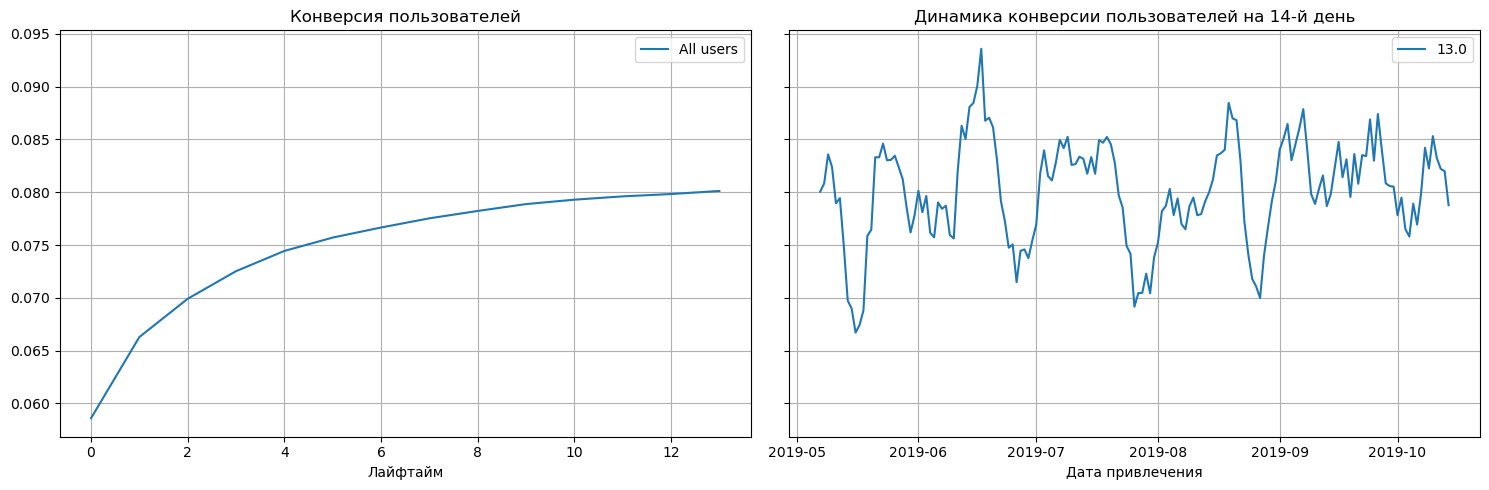

In [55]:
#построим график конверсии и ее динамики
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_final, orders, max_analysis_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** Судя по графикам, конверсия растет и довольна стабильна. Особенно хороший рост у конверсии на первой неделе, к концу второй недели рост замедляется. Максимальный уровень конверсии был в июне.

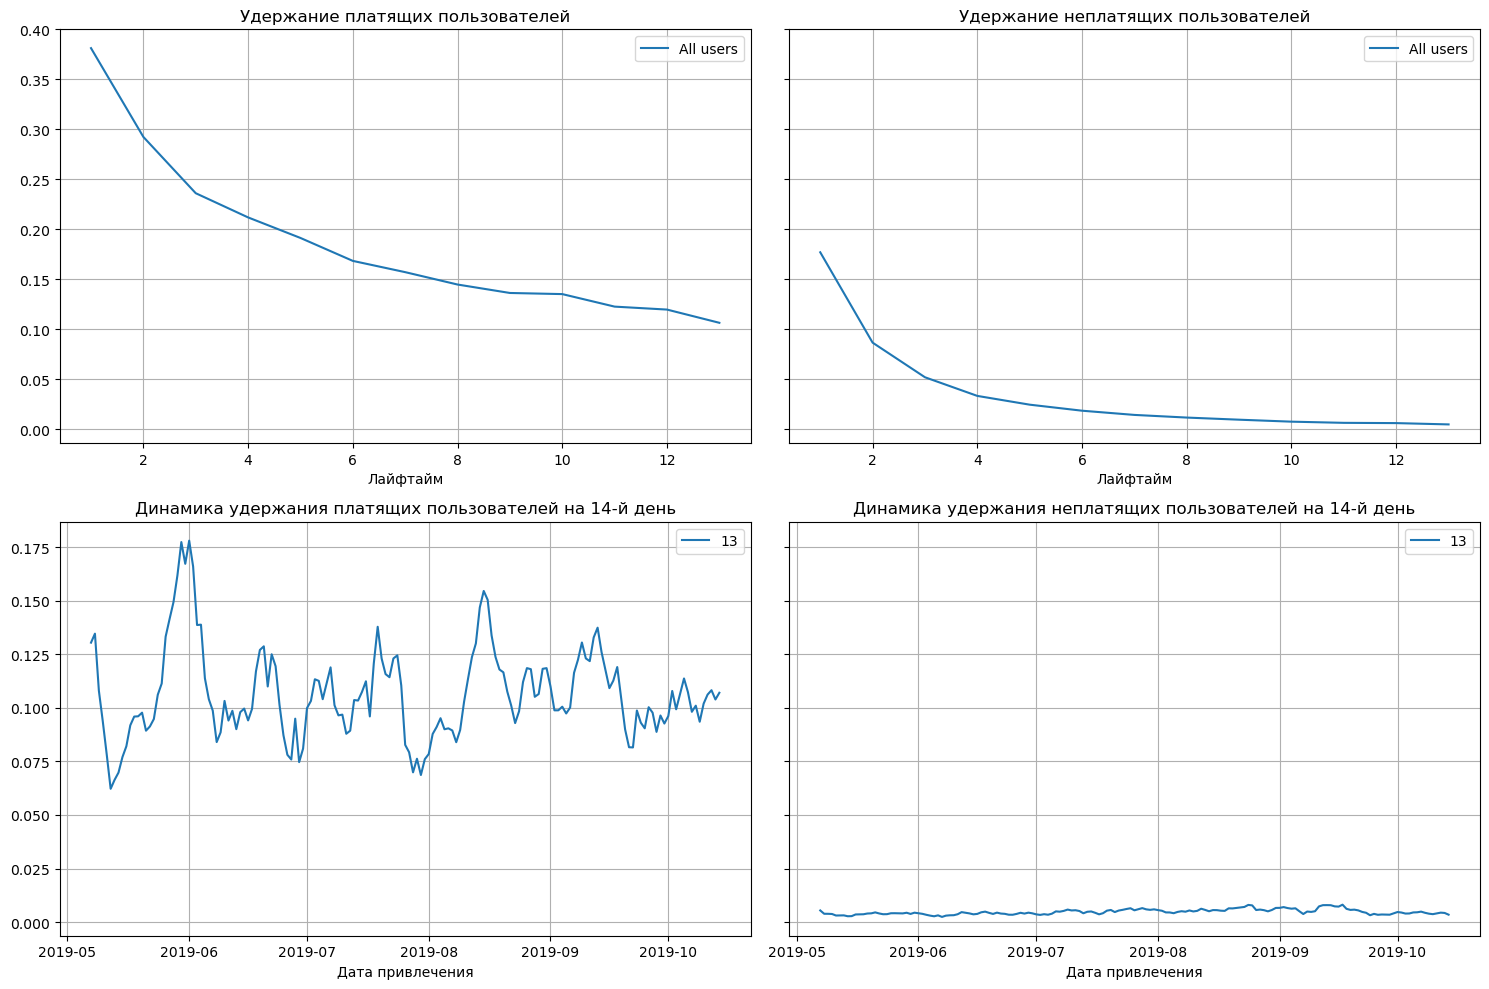

In [56]:
#построим график удержания и его динамики
retention_raw, retention_grouped, retention_history = get_retention(profiles_final, visits, max_analysis_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** 
- Платящие пользователи удерживаются лучше, чем неплатящие
- Динамика удержания платящих пользователей довольно стабильна. Максимальный уровень удержания был в июне. Динамика удержания неплатящих клиентов стабильна. 

#### 6.3 Анализ окупаемости рекламы с разбивкой по устройствам

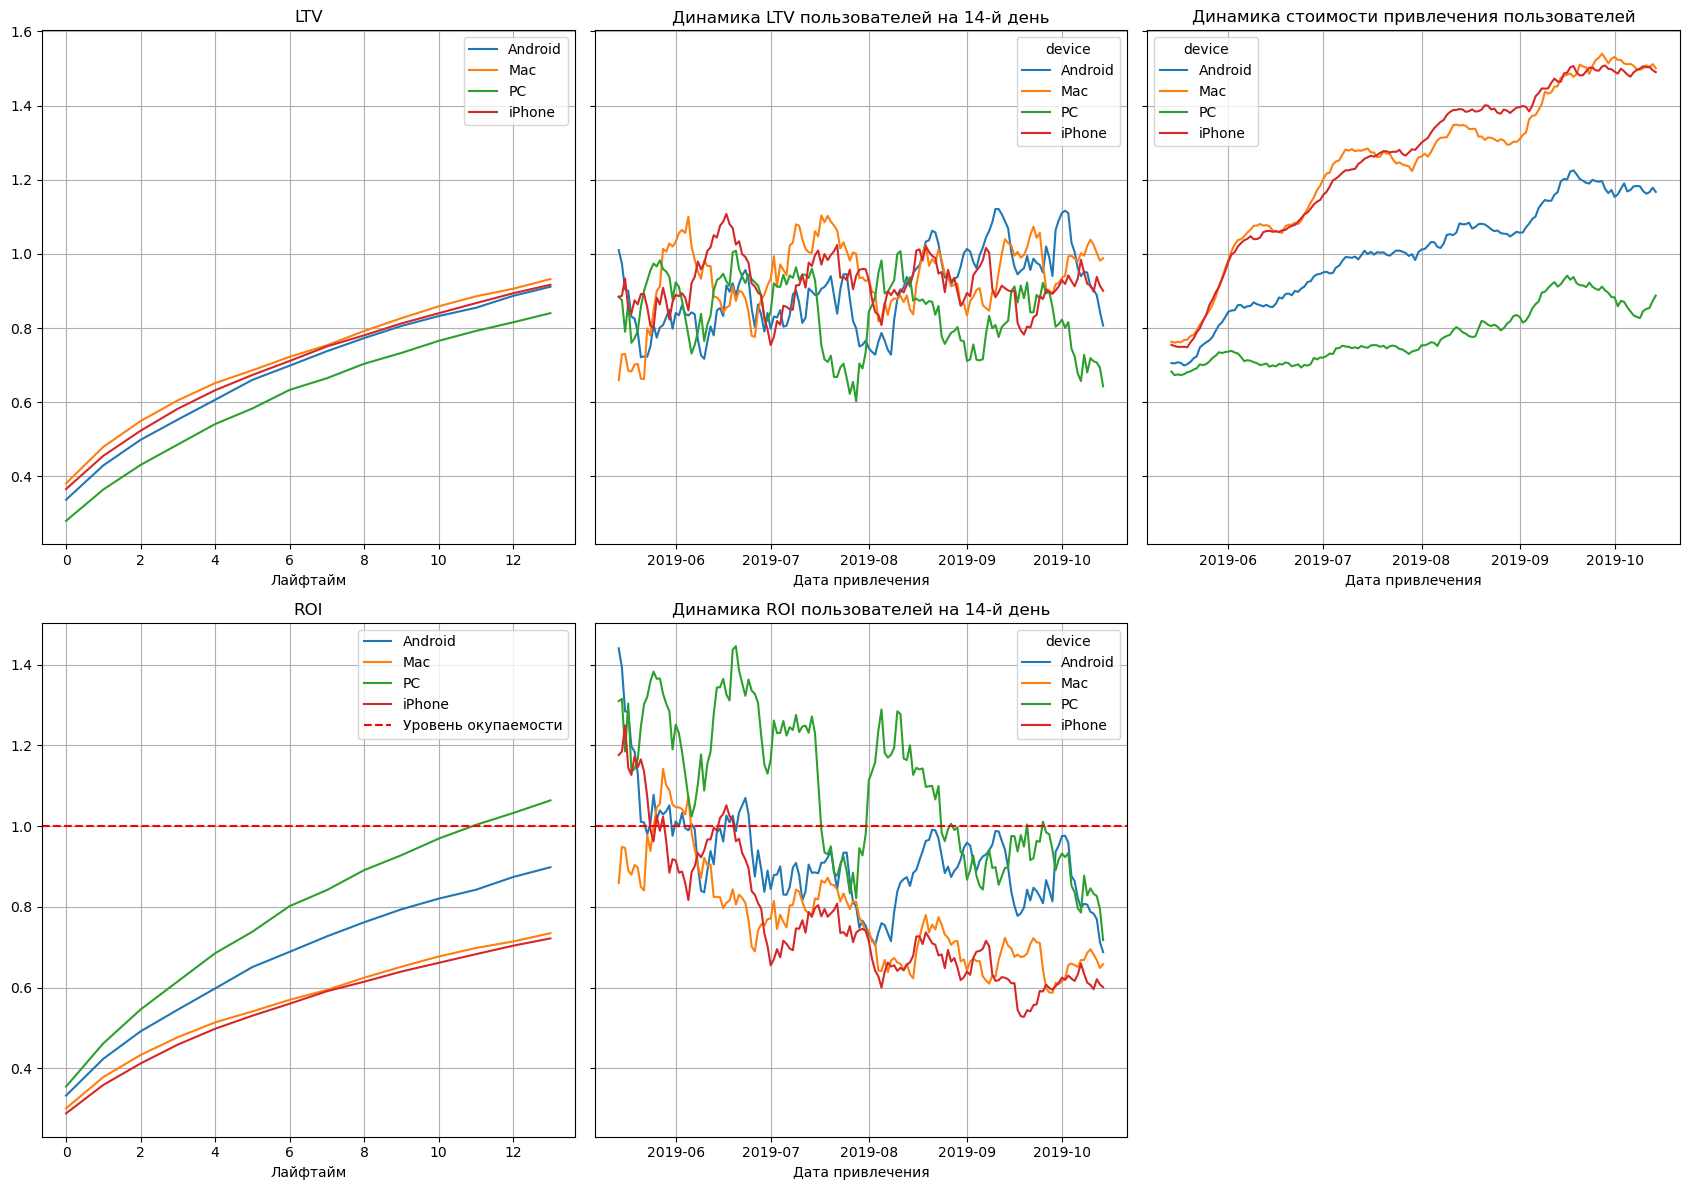

In [57]:
#построим графики окупаемости с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_final, orders, max_analysis_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 


**Вывод**
- Mac, iPhone и Android являются лидерами по уровню LTV, PC немного отстает от лидеров. 
- LTV довольно стабилен для всех устройств, однако можно заметить, что в некоторые месяца, например, мае, июне, августе LTV у лидеров - Mac, iPhone и Android падает ниже уровня LTV у PC.
- Стоимость привлечения пользователей растет для всех устройств, однако больше всего для Mac и iPhone. Меньше всего растет САС для PC.
- Окупаемость рекламы зависит от САС. Как видим из графиков, реклама для Mac, iPhone и Android не окупается. Окупаемость рекламы для Mac, iPhone ниже всего - примерно на 70%, Android на 90%. Реклама для PC окупается примерно на 110% только к концу второй недели. С ростом расходов на рекламу снижается и окупаемость.

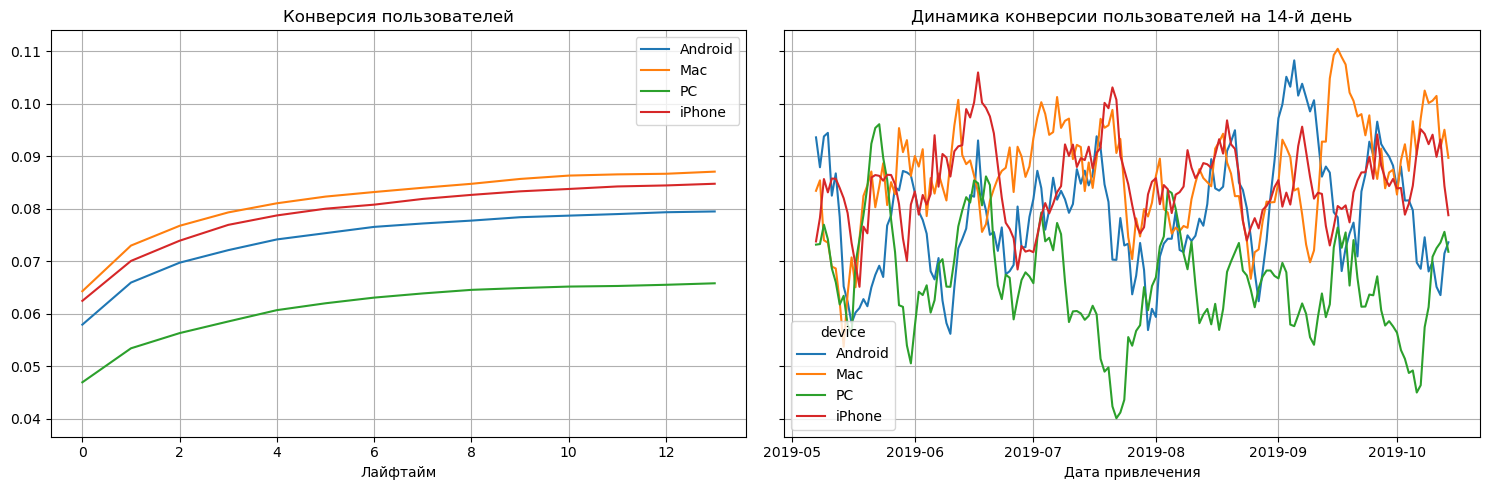

In [58]:
#посмотрим на конверсию с разбивкой по устройствам
dimensions=['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_final, orders, max_analysis_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Лидерами по конверсии опять же являются Mac, iPhone и Android. Самый низкий уровень конверсии у PC. Конверсия у всех устройств довольно стабильна.

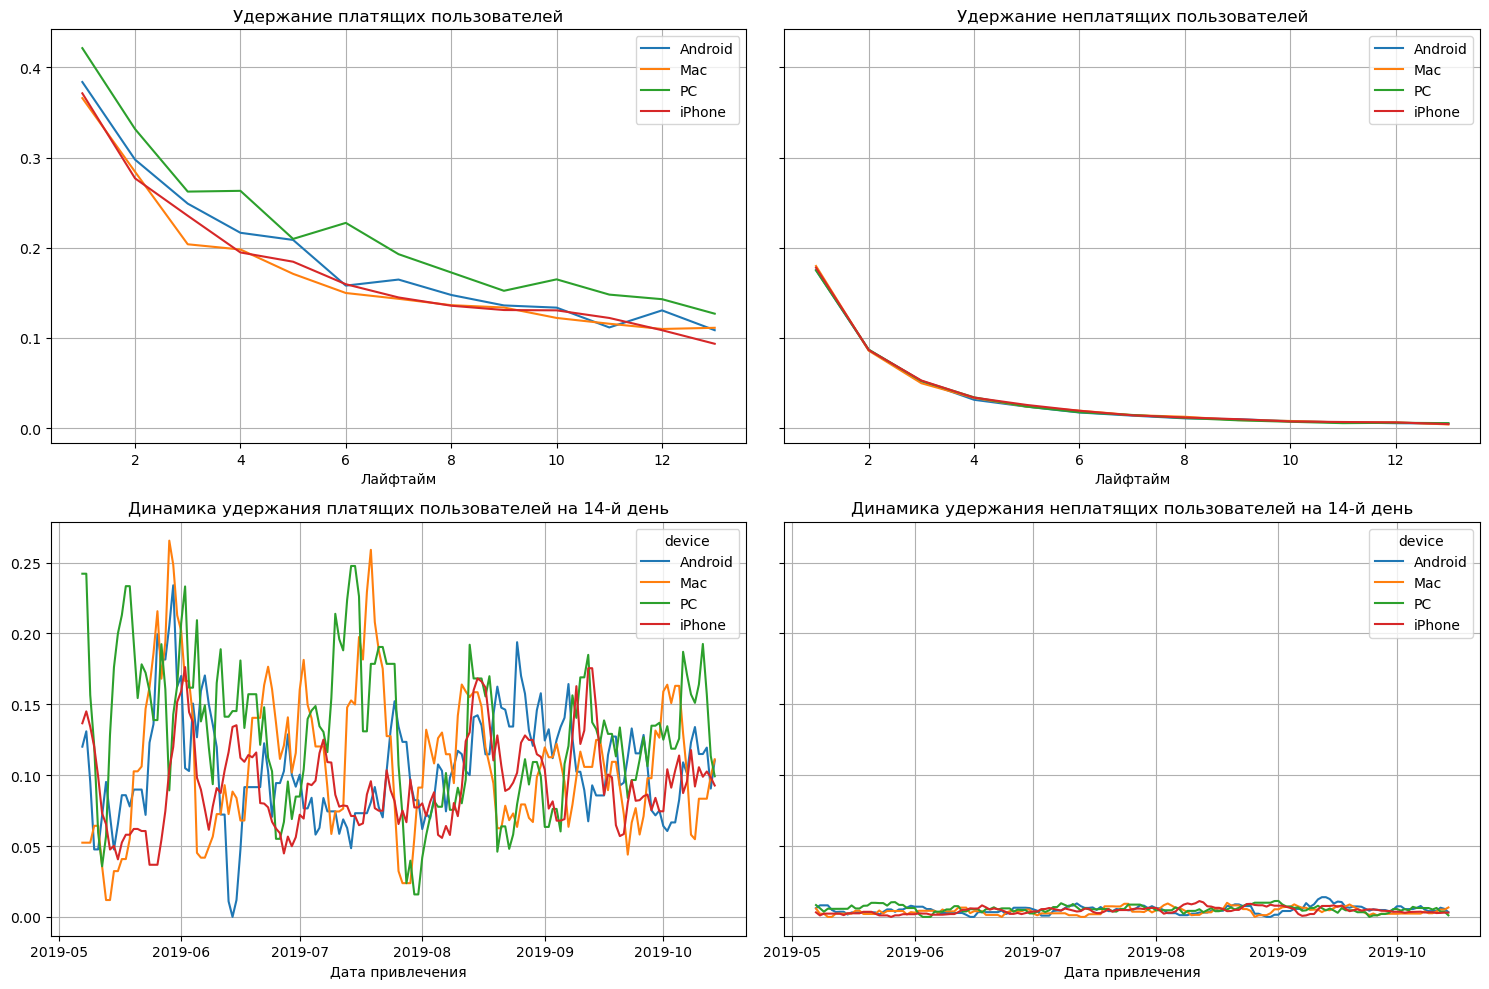

In [59]:
# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(profiles_final, visits, max_analysis_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** Удержание платящих пользователей лучше, чем неплатящих. Самый высокий уровень удержания у PC, однако явных лидеров или аутсайдеров нет.  

#### 6.4 Анализ окупаемости рекламы с разбивкой по странам

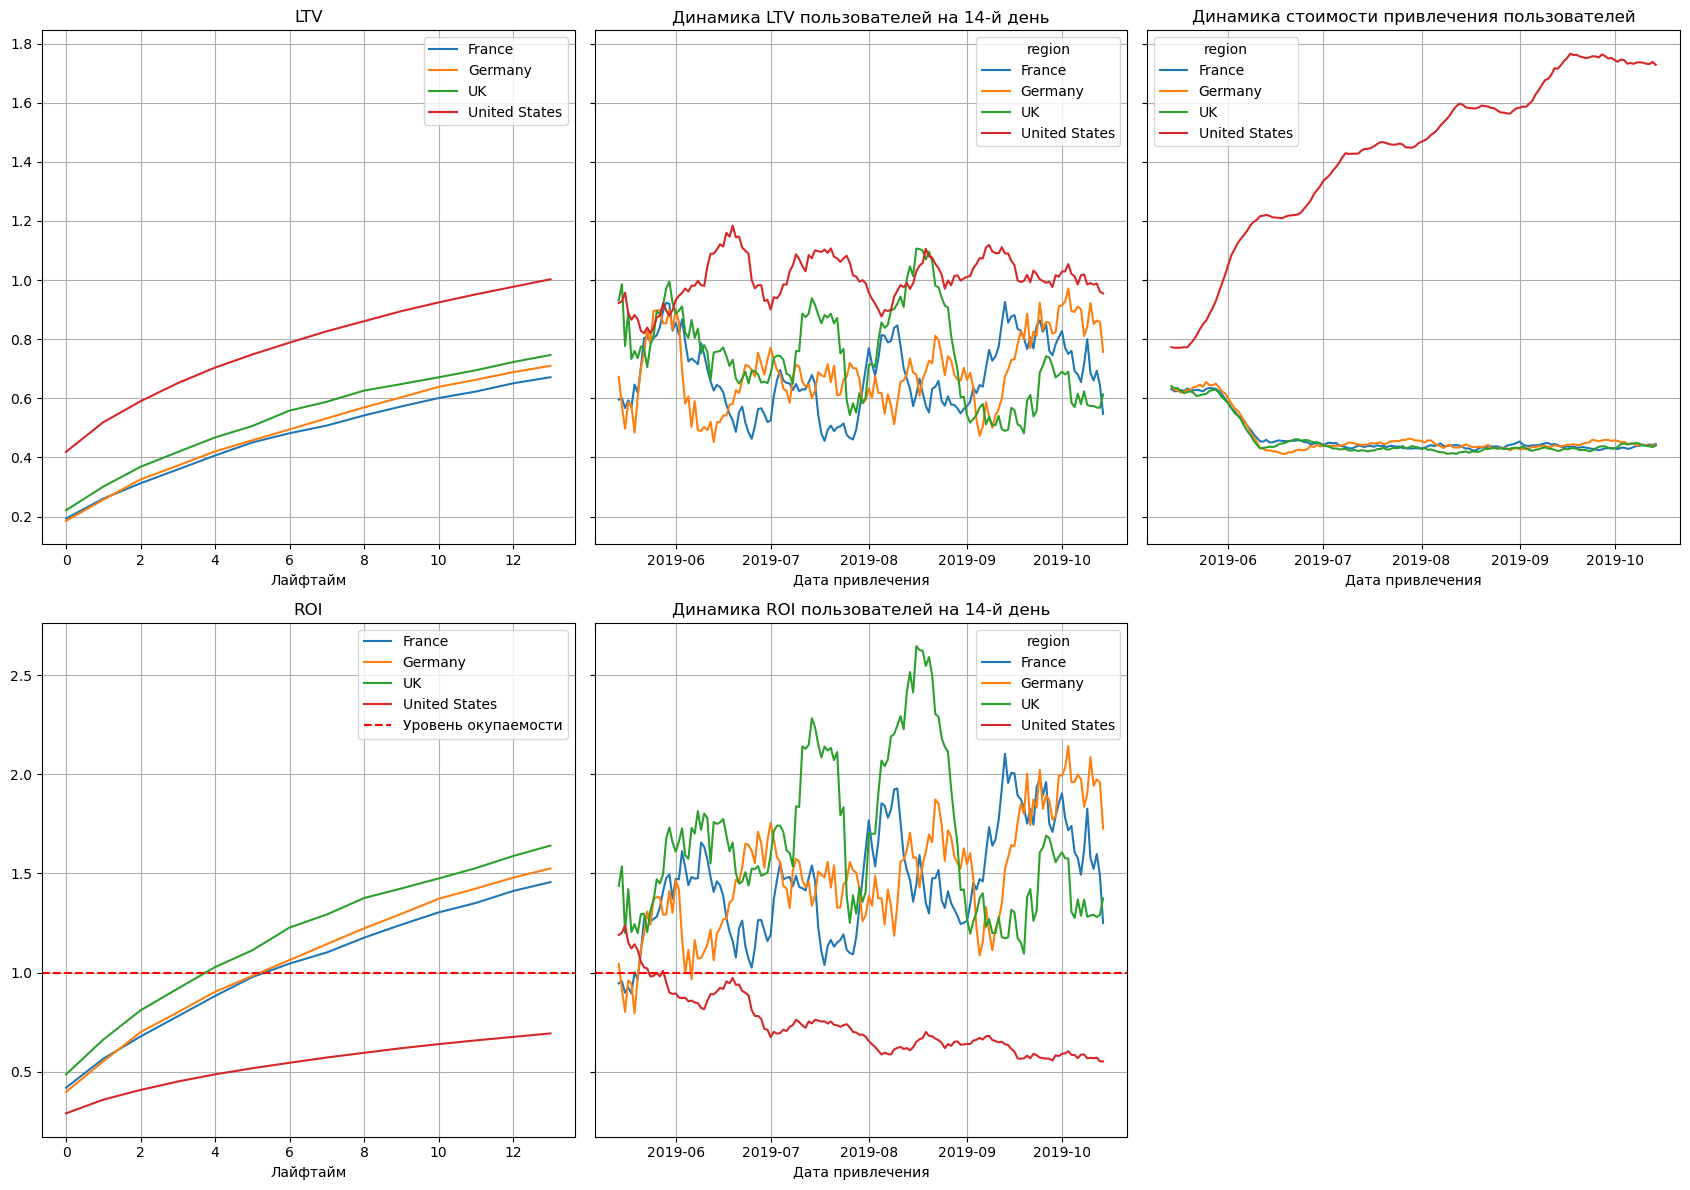

In [60]:
#посмотрим на окупаемость с разбивкой по странам
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_final, orders, max_analysis_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:**
- Явным лидером по LTV является США. Европейские страны проигрывают и находятся примерно на одном уровне LTV
- Реклама в европейских странах окупается уже на 4ый-6ой день. Лучше всего результат у Великобритании. Реклама в США не окупается и к концу 2ой недели выходит только примерно на 70%. 
- Неокупаемость рекламы в США связана с очень большим ростом расходов на рекламу, тогда как расходы на рекламу европейских стран снижаются в июне и остаются стабильными на протяжении всего времени. Необходимо выяснить, с чем связян такой сильный рост стоимости трафика в США. 

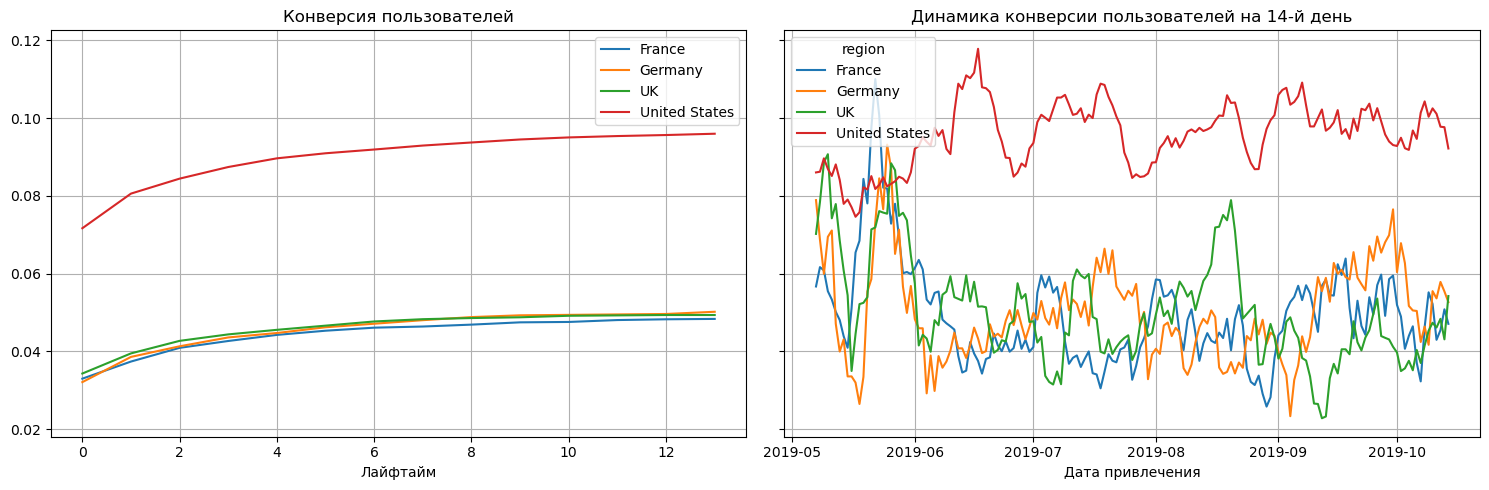

In [61]:
#смотрим конверсию с разбивкой по странам
dimensions=['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_final, orders, max_analysis_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Лучше всего конвертируются пользователи в США, конверсия также стабильна во времени. Европейские страны довольно сильно проигрывают и имеют примерно одинаковый уровень конверсии. 

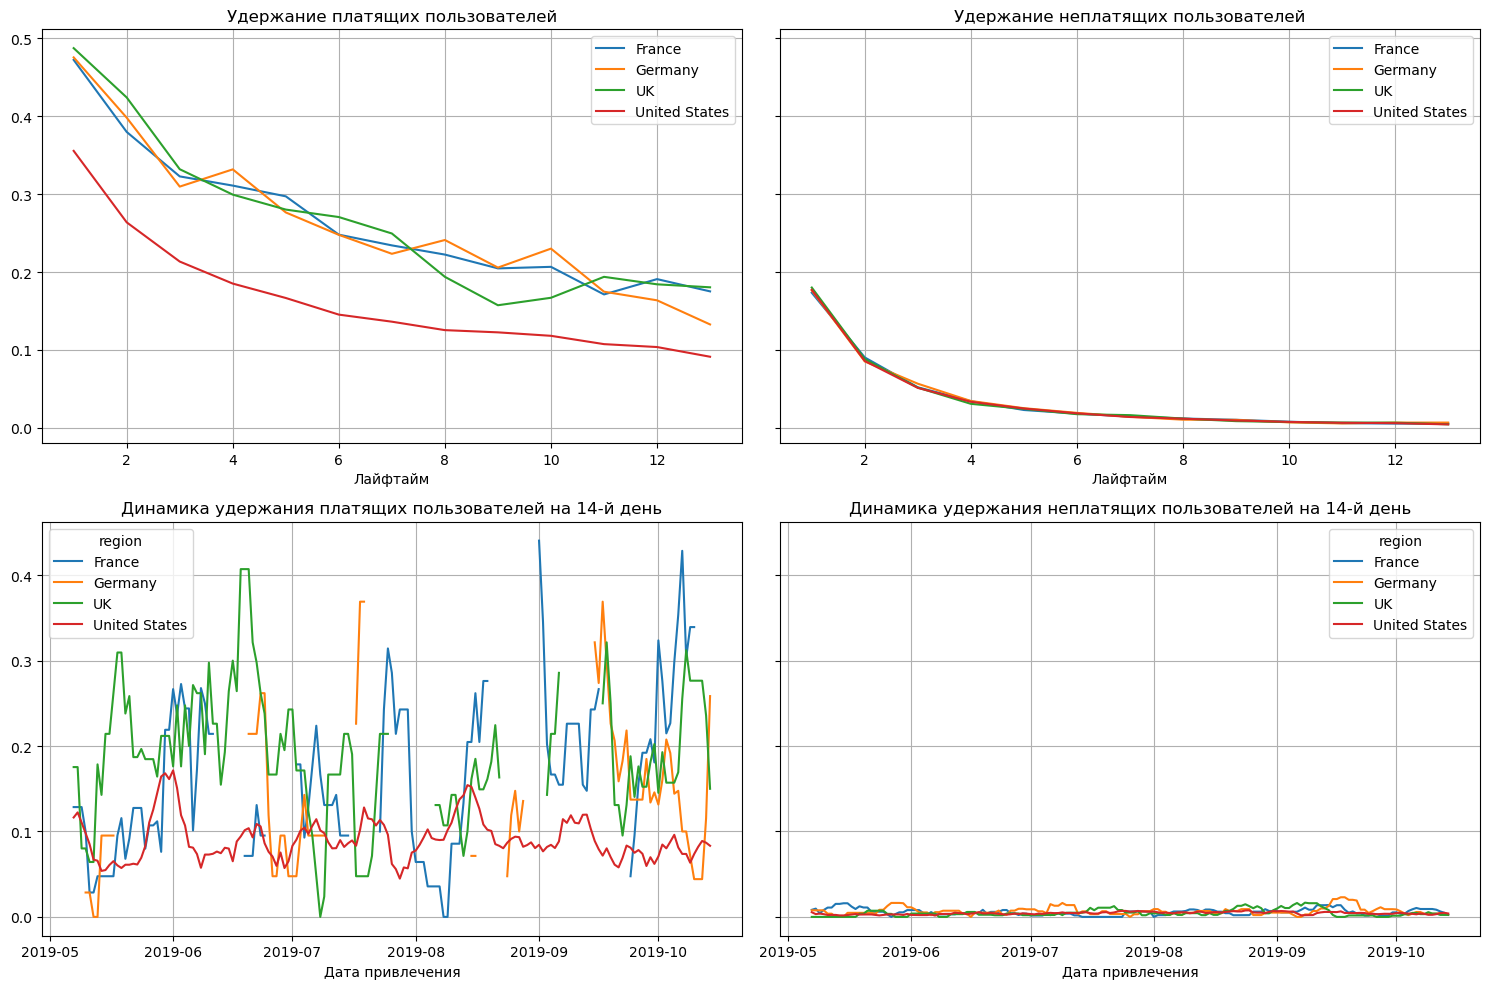

In [62]:
#смотрим удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(profiles_final, visits, max_analysis_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** 
- Удержание платящих клиентов лучше, чем у неплатящих
- Европейские страны выигрывают с точки зрения удержания, лучший результат у Великобритании и Франции. У США самый низкий уровень удержания клиентов.  

#### 6.5 Анализ окупаемости рекламы с разбивкой по рекламным каналам

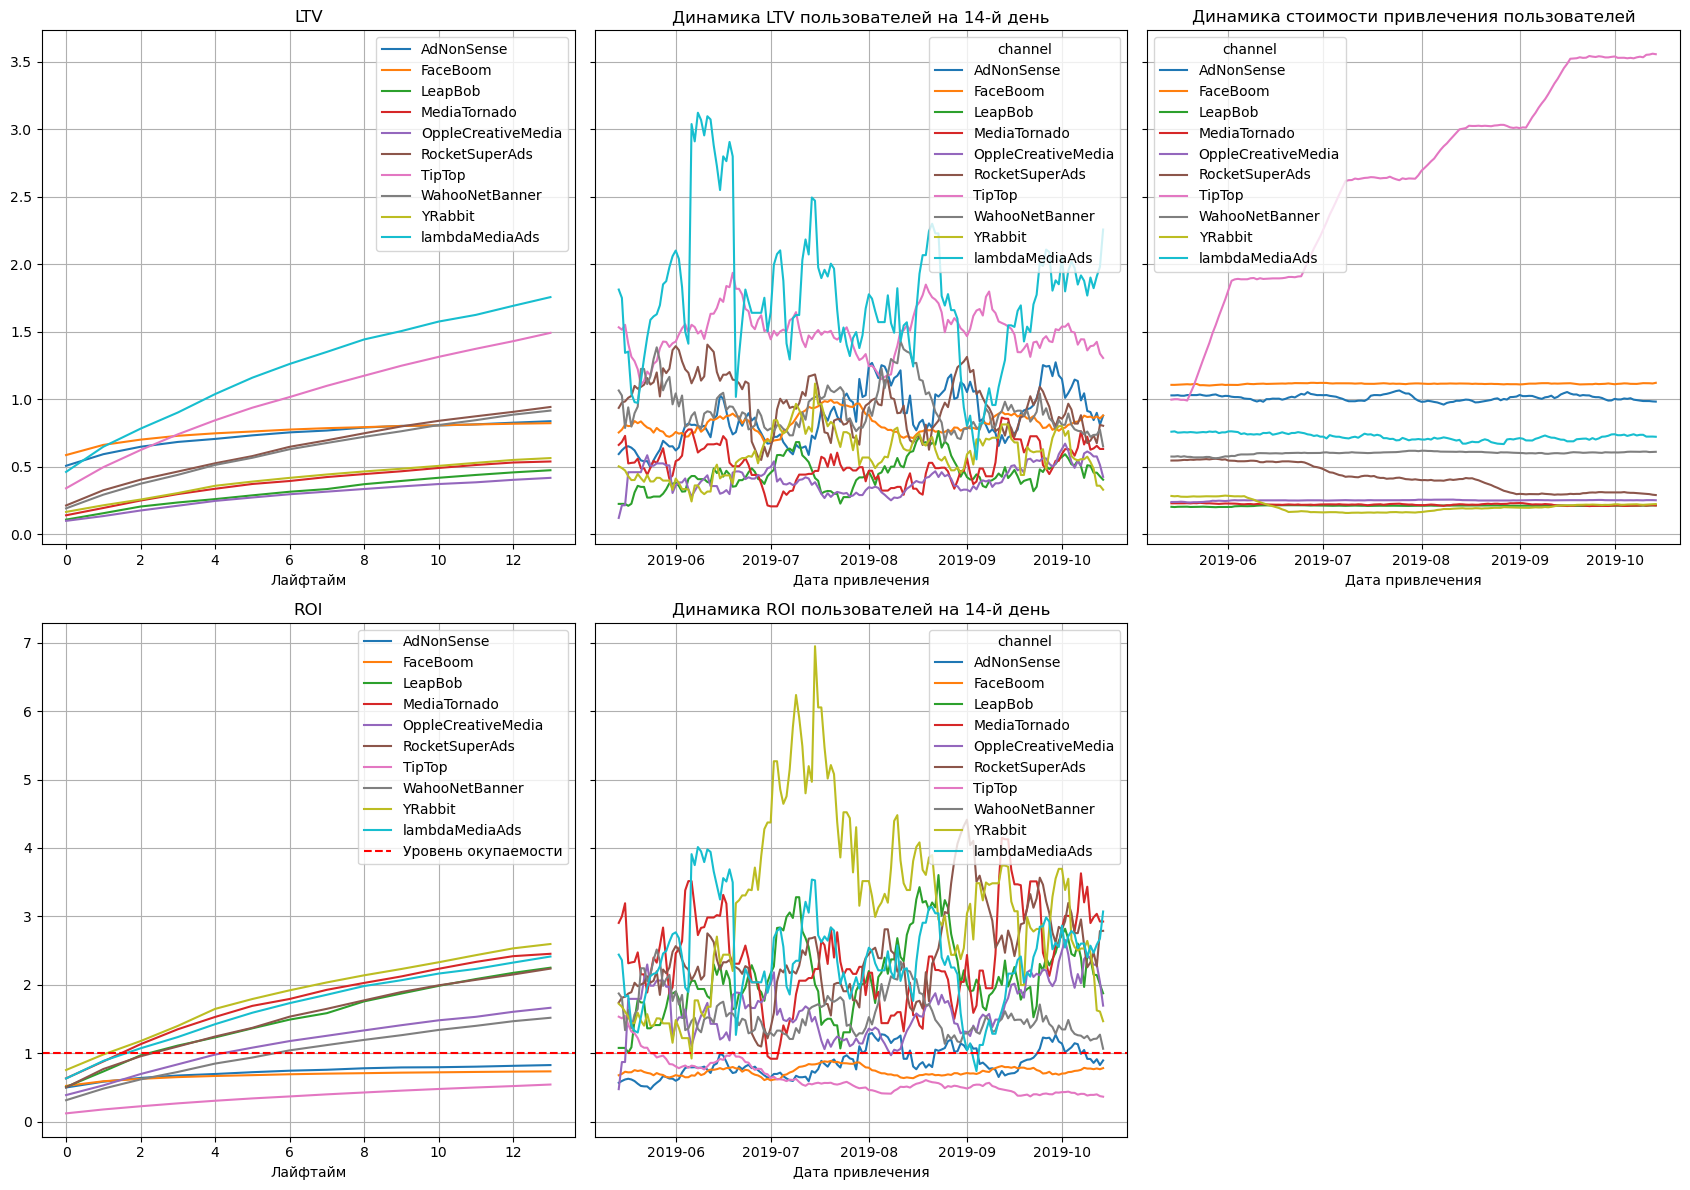

In [63]:
#посмотрим на окупаемость с разбивкой по рекламным каналам
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_final, orders, max_analysis_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:**
- С точки зрения LTV лидерами являются каналы lamdaMediaAds и TipTop. Остальные каналы проигрывают, однако явных аутсайдеров нет. 
- Реклама большинства каналов окупается на 2ой-6ой день. Лучший результат у YRabbit, однако явных победителей нет. Реклама каналов AdNonSense, FaceBoom и TipTop не окупается. 
- Динамика окупаемости большинства каналов довольна стабильна, кроме канала YRabbit, у которого наблюдается большой рост в июле. 
- САС канала TipTop очень сильно растет, что и является причиной неокупаемости рекламы этого канала. САС остальных каналов довольно стабильны. 


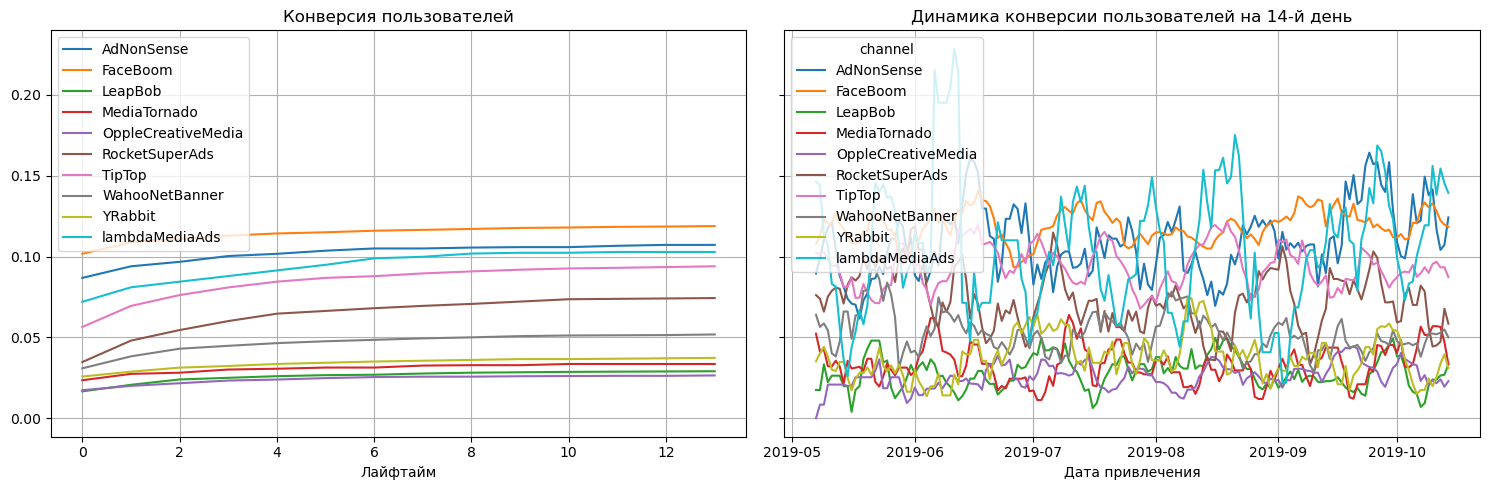

In [64]:
#смотрим конверсию с разбивкой по рекламным каналам
dimensions=['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_final, orders, max_analysis_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Конверсия довольна стабильна для большинства каналов. Лучший результат у FaceBoom, однако с точки зрения конверсии явных лидеров и аутсайдеров нет. 

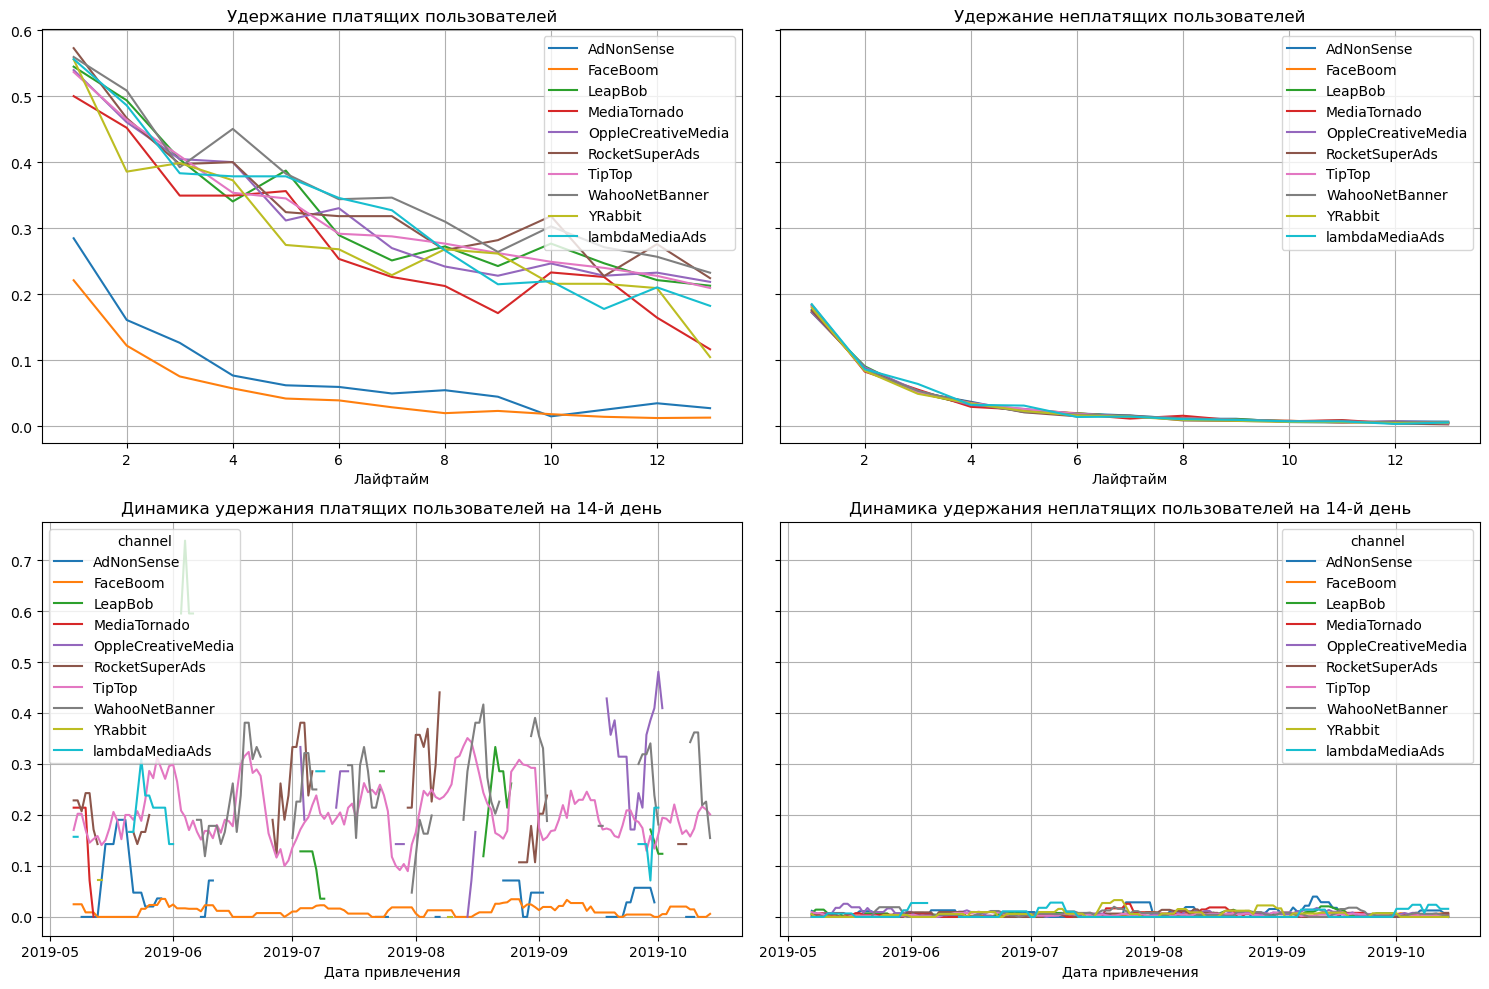

In [65]:
# смотрим удержание с разбивкой  по рекламным каналам
retention_raw, retention_grouped, retention_history = get_retention(profiles_final, visits, max_analysis_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
- С точки зрения удержания явными аутсайдерами являются AdNonSense и FaceBoom. Удержание пользователей этих каналов почти совпадает с удержанием неплатящих пользователей и к концу 2ой недели приближается к нулю. 
- На остальных каналах результаты удержания лучше, не совсем стабильны и явного лидера выявить сложно.  

In [66]:
#посмортим с каких устройств заходят в приложение чаще всего в разбивке по странам
profiles_final.pivot_table(index='region', columns='device', values='user_id', aggfunc='nunique')

device,Android,Mac,PC,iPhone
region,,,,
France,3313,1163,4384,2198
Germany,2849,1020,3797,1862
UK,3243,1086,4551,2274
United States,12436,15424,6421,27548


**Вывод:**
- Как видно из таблицы, iPhone и Mac имеют наибольшую популярность в США. 
- В европейских странах лидера с точки зрения устройства выделить сложно

In [67]:
#посмортим как рекламные каналы распределены по странам 
profiles_final.pivot_table(index='channel', columns='region', values='user_id', aggfunc='nunique').fillna(0)

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,0.0
FaceBoom,0.0,0.0,0.0,29144.0
LeapBob,2988.0,2519.0,3046.0,0.0
MediaTornado,0.0,0.0,0.0,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,0.0
RocketSuperAds,0.0,0.0,0.0,4448.0
TipTop,0.0,0.0,0.0,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,0.0
YRabbit,0.0,0.0,0.0,4312.0


**Вывод:**
- Самые крупные каналы, через которые пришли 32% пользователей - FaceBoom и TipTop, являются американскими каналами. 
- Канал AdNonSense, являющийся номером 2 с точки зрения доли платящих клиентов, работает в европейских странах. 

#### 7. Общие выводы и промежуточные рекомендации

**Выводы:**
- В целом реклама, направленная на привлечение пользователей, не окупается. Общий ROI на конец второй недели находится на уровне 80%.
- Показатель LTV достаточно стабилен, то есть причина неокупаемости рекламы не в ухудшении качества пользователей.
- Стоимость привлечения пользователей растет и к концу второй недели сильно превышает LTV, что является как минимум одной из причин неокупаемости рекламы.
- Общая конверсия растет и довольно стабильна. Кривая удержания пользователей ведет себя ожидаемо.  
- В разрезе устройств, явных лидеров по уровню LTV нет. Реклама для Mac, iPhone и Android не окупается совсем. Реклама для PC едва окупается к концу второй недели. Стоимость привлечения пользователей растет для всех устройств, однако больше всего для Mac и iPhone. Меньше всего растет САС для PC. Лидерами по конверсии опять же являются Mac, iPhone и Android. Самый низкий уровень конверсии у PC. Уровни удержания для всех устройств примерно одинаковы.  
- В разрезе регионов, явным лидером по LTV является США. Однако, реклама в США совсем не окупается, а реклама в европейских странах окупается уже на 4ый-6ой день. Неокупаемость рекламы в США связана с очень большим ростом САС, тогда как САС европейских стран снижается в июне и остается стабильным на протяжении всего времени. США является явным лидером с точки зрения конвертации, однако у США самый плохой результат удержания пользователей. 
- В разрезе рекламных каналов, лидерами по LTV являются каналы lamdaMediaAds и TipTop. Реклама большинства каналов окупается на 2ой-6ой день и только реклама каналов AdNonSense, FaceBoom и TipTop не окупается. САС канала TipTop очень сильно растет, САС остальных каналов довольно стабилен. С точки зрения конверсии явных лидеров и аутсайдеров нет. С точки зрения удержания явными аутсайдерами являются AdNonSense и FaceBoom.
- В целом, негативное влияние на окупаемость рекламы оказывают:
     - в большей степени устройста Mac и iPhone, в меньшей степени Android
     - регион США
     - каналы TipTop, AdNonSense и FaceBoom
- США привлекает 66% пользователей и является лидером с точки зрения доли платящих клиентов, LTV и конвертации. При этом реклама в США совсем не окупается, у США самая высокая стоимость привлечения клиентов и самый низкий уровень удержания пользователей. Из этого следует, что качество пользователей в США хорошее, они легко делают первую покупку, однако до последующих покупок дело не доходит. Возможными причинами могут быть:
    - Техническая причина: возможно после совершения первой покупки клиенты обнаруживают, что приложение не работает, так как должно, поэтому перестают им пользоваться. Как мы уже знаем, пользователи США предпочитают устройства iPhone и Mac, возможно приложение некорректно работает на этих устройствах. Как видно из анализа, устройства iPhone и Mac являются проблемными с точки зрения окупаемости рекламы.
    - Менталитет: жители США более часто совершают импульсивные покупки. Возможно в этом кроется причина быстрой потери интереса к приложению.
- Необходимо отметить, что каналы FaceBoom и TipTop, приносящие 32% от общего числа пользователей, однако являющиеся одними из самых проблемных каналов с точки зрения высоких трат и плохой окупаемости, - американские реклманые каналы. 

**Рекомендации:**
 - Проверить приложение на наличие технических проблем, в особенности для устройств iPhone и Mac
 - Снизить расходы на дорогие и неокупаемые каналы, в особенности TipTop, а также AdNonSense и FaceBoom
 - Перенаправить часть бюджета в направлении удержания пользователей США, например разработка различных видов рассылок с персональными рекомендациями или предложением следующей наиболее вероятной покупки. Так как пользователи США являются лидерами по LTV, уменьшение количества потерянных клиентов окажет более значительное влияние прибыль, чем просто дополнительные расходы на рекламную кампанию.
 - Перенаправить часть бюджета на потенциально прибыльное направление европейских стран
 - С точки зрения рекламных каналов, перенаправить доход на менее дорогие и потенциально прибыльные каналы. Например, в Европе на lamdaMediaAds (лидер по LTV и номер 3 по доле платящих клиентов) и LeapBob (самый низкий САС). В США на YRabbit и MediaTornado (одни из самых низких САС)
 - Перенаправить часть бюджета на сбор обратной связи, чтобы понять с какими проблемами/сложностями сталкиваются пользователи, улучшить качество обслуживания и найти способы построить с клиентами долгосрочные отношения. 

###  8. Вывод

**Цель исследования:** изучить данные о пользователях и рекламных вложениях, чтобы разобраться в причинах убытков и помочь компании выйти в плюс.

**Ход исследования:** Данные о пользователях и рекламных вложениях были получены из файлов visits_info_short.csv, orders_info_short.csv, costs_info_short.csv. Перед анализом была проведена предобработка данных, в ходе котрой были сделаны следующие шаги:
- проверка на пропуски в данных - пропусков в данных не оказалось
- названия столбцов были приведены к нижнему регистру
- данные столбцов с информацией о дате и времени были приведены к формату datetime
- данные были проверены на наличие явных и неявных дубликатов - таковых в данных не оказалось

Для анализа данных были предприняты следующие шаги:
- Заданы функции для расчёта и анализа LTV, ROI, удержания и конверсии.
- Составлены профили пользователей. Расчитано количество пользователей и доля платящих пользователей в разрезе регионов, устройст и рекламных каналов.
- Посчитана сумма расходов на маркетинг и распределение расходов по каналам, а также САС по каждому каналу
- Проанализированы окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI, конверсия и удержание пользователей. Анализ также был проведен в разрезе по регионам, устройствам и каналам. 

**Итоги исследования:** В целом реклама, направленная на привлечение пользователей, не окупается. Стоимость привлечения пользователей растет и к концу второй недели сильно превышает LTV - неэффективное распределение бюджета по рекламным каналам является одной из главных причин неокупаемости рекламы. Проблемным регионом является США - реклама в США не окупается в связи с очень дорогим трафиком - каналы FaceBoom и TipTop, возможной технической проблемой на устройствах iPhone и Mac, низким уровнем удержания клиентов. В рамках европейских стран реклама в целом окупается, однако есть и проблемные каналы, например AdNonSense. 

**Рекомендации для отдела маркетинга:**

 - Проверить приложение на наличие технических проблем, в особенности для устройств iPhone и Mac
 - Снизить расходы на дорогие и неокупаемые каналы, в особенности TipTop, а также AdNonSense и FaceBoom
 - Перенаправить часть бюджета в направлении удержания пользователей США, например разработка различных видов рассылок с персональными рекомендациями или предложением следующей наиболее вероятной покупки. Так как пользователи США являются лидерами по LTV, уменьшение количества потерянных клиентов окажет более значительное влияние прибыль, чем просто дополнительные расходы на рекламную кампанию.
 - Перенаправить часть бюджета на потенциально прибыльное направление европейских стран
 - С точки зрения рекламных каналов, перенаправить доход на менее дорогие и потенциально прибыльные каналы. Например, в Европе на lamdaMediaAds (лидер по LTV и номер 3 по доле платящих клиентов) и LeapBob (самый низкий САС). В США на MediaTornado (одни из самых низких САС)
 - Перенаправить часть бюджета на сбор обратной связи, чтобы понять с какими проблемами/сложностями сталкиваются пользователи, улучшить качество обслуживания и найти способы построить с клиентами долгосрочные отношения.